## 단어 빈도를 이용한 벡터화
- 자연어처리에서는 텍스트를 숫자 벡터로 변환하는 벡터화(Vectorization)과정을 거침
- 벡터화 과정은 크게 두 가지로 나눠짐
    (1) 통계와 머신러닝을 활용한 방법
    (2) 인공신경망을 활용하는 방법
- 우선, (1) 통계와 머신러닝을 활용한 방법을 통한 벡터화 방법을 알아보겠음

### Bag of Words(BoW)
- 자연어 처리(Natural Language Processing), 정보 검색(Information Retrieval)에서 쓰이는 간단한 단어 표현 방법
- 문서 내의 단어들의 분포를 통해 문서의 특성을 파악하는 기법
- 텍스트를 단어 단위로 트큰화(tokenization) -> 단어의 순서는 무시, 중복 허용, 빈도 정보 보존

In [1]:
doc = 'John likes to watch movies. Mary likes movies too. Mary also likes to watch football games.'

In [2]:
BoW = {"John":1, "likes":3, "to":2, "watch":2, "movies":2, "Mary":2, "too":1, "also":1, "football":1, "games":1};

**케라스 토크나이저를 통해 Bag of Words을 만들기**

In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer

sentence = ["John likes to watch movies. Mary likes movies too! Mary also likes to watch football games."]

tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentence) # 단어장 생성
bow = dict(tokenizer.word_counts) # 각 단어와 각 단어의 빈도를 bow에 저장

print("Bag of Words :", bow) # bow 출력
print('단어장(Vocabulary)의 크기 :', len(tokenizer.word_counts)) # 중복을 제거한 단어들의 개수

Bag of Words : {'john': 1, 'likes': 3, 'to': 2, 'watch': 2, 'movies': 2, 'mary': 2, 'too': 1, 'also': 1, 'football': 1, 'games': 1}
단어장(Vocabulary)의 크기 : 10


- 여기서 단어장은 중복을 제거한 단어들의 집합을 말함
- 단어장과 BoW는 다른 개념

**scikit-learn CountVectorizer 활용**

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

sentence = ["John likes to watch movies. Mary likes movies too! Mary also likes to watch football games."]

vector = CountVectorizer()
bow = vector.fit_transform(sentence).toarray() # 각 단어의 빈도만 출력 # 어떤 단어인지 모름

print('Bag of Words : ', bow) # 코퍼스로부터 각 단어의 빈도수를 기록한다.
print('각 단어의 인덱스 :', vector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되었는지를 보여준다.

Bag of Words :  [[1 1 1 1 3 2 2 2 1 2]]
각 단어의 인덱스 : {'john': 3, 'likes': 4, 'to': 7, 'watch': 9, 'movies': 6, 'mary': 5, 'too': 8, 'also': 0, 'football': 1, 'games': 2}


In [5]:
vector.fit_transform(sentence).toarray()

array([[1, 1, 1, 1, 3, 2, 2, 2, 1, 2]])

In [6]:
vector.fit_transform(sentence)

<1x10 sparse matrix of type '<class 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [7]:
print('단어장(Vocabulary)의 크기 :', len(vector.vocabulary_))

단어장(Vocabulary)의 크기 : 10


### DTM(Document-Term Matrix)과 코사인 유사도
- DTM은 여러 문서의 Bag of Words를 하나의 행렬로 구현한 것
- DTM은 각 문서에 등장한 단어의 빈도수를 하나의 행렬로 통합
- DTM은 문서를 행으로, 단어를 열로 가지는 행렬이지만 문헌에 따라서 행과 열이 달라지기도 하여 TDM(Term-Document Matrix)이라고도 불리기도 함
- DTM을 사용하면 각 문서들을 비교하고, 각 문서 간 유사도를 구할 수 있음

**코사인 유사도(Cosine Similarity)**
- 코사인 각도를 이용하여 두 벡터간의 유사도를 구할 수 있음
- 값의 범위는 -1 ~ 1이며, 1에 가까울 수록 유사도가 높다고 판단할 수 있으며, 이는 두 벡터가 가르키는 방향이 얼마나 유사한지를 알려줌

In [8]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

doc1 = np.array([0,1,1,1]) # 문서1 벡터
doc2 = np.array([1,0,1,1]) # 문서2 벡터
doc3 = np.array([2,0,2,2]) # 문서3 벡터

def cos_sim(A, B):
    return dot(A, B)/(norm(A)*norm(B))

In [9]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

doc1 = np.array([0,1,1,1]) # 문서1 벡터
doc2 = np.array([1,0,1,1]) # 문서2 벡터
doc3 = np.array([2,0,2,2]) # 문서3 벡터

def cos_sim(A, B):
    return dot(A, B)/(norm(A)*norm(B))

### DTM의 구현과 한계점

**scikit-learn CountVectorizer 활용**

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    'John likes to watch movies',
    'Mary likes movies too',
    'Mary also likes to watch football games',    
]
vector = CountVectorizer()

print(vector.fit_transform(corpus).toarray()) # 코퍼스로부터 각 단어의 빈도수를 기록.
print(vector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되었는지를 보여준다.

[[0 0 0 1 1 0 1 1 0 1]
 [0 0 0 0 1 1 1 0 1 0]
 [1 1 1 0 1 1 0 1 0 1]]
{'john': 3, 'likes': 4, 'to': 7, 'watch': 9, 'movies': 6, 'mary': 5, 'too': 8, 'also': 0, 'football': 1, 'games': 2}


**DTM의 한계점**
- DTM에서 문서의 수와 단어의 수가 늘어갈수록 0의 값을 가지는 행과 열이 많아짐 -> 저장공간 낭비, 차원의 저주 문제 발생
- 단어의 빈도만 집중하는 방법 자체의 한계가 있음 -> 영어에서 'the'를 생각해보면, 이 단어가 많다고 유사한 문서라고 보기는 어려움

### TF-IDF(Term Frequency-Inverse Document Frequency)
- DTM의 한계점을 보완한 기본적으로 모든 문서에서 자주 등장하는 단어는 중요도가 낮다는 가정 하에, 특정 문서에서 자주 등장하는 단어는 중요도가 높다고 판단하는 것.
- 불용어로 인한 노이즈를 완화해 줌
- 그렇다고 해서 항상 TF-IDF가 DTM보다 뛰어난 것은 아님
- TF-IDF를 사용하기 위해서는 우선 DTM을 만든 뒤에 TF-IDF 가중치를 DTM에 적용해야 함

**TF-IDF 구현하기**

In [11]:
from math import log
import pandas as pd

In [12]:
docs = [
  'John likes to watch movies and Mary likes movies too',
  'James likes to watch TV',
  'Mary also likes to watch football games',  
]

In [13]:
# DTM 열을 만들기 위해서 단어장 만들기
vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()
print('단어장의 크기 :', len(vocab))
print(vocab)

단어장의 크기 : 13
['James', 'John', 'Mary', 'TV', 'also', 'and', 'football', 'games', 'likes', 'movies', 'to', 'too', 'watch']


In [14]:
N = len(docs) # 총 문서의 수
N

3

In [15]:
# TF-IDF 함수
def tf(t, d):
    return d.count(t)
 
def idf(t):
    df = 0
    for doc in docs:
        df += t in doc    
    return log(N/(df + 1)) + 1 
# 분모에 1을 더하는 이유 : 특정 단어가 전체 문서에서 등장하지 않아서 분모가 0이 되는 상황 방지
# log 항에 1을 더하는 이유: log항의 분자와 분모값이 같아져서 idf 값이 0이 되는 것을 방지
 
def tfidf(t, d):
    return tf(t,d)* idf(t)

In [16]:
# TF 함수를 이용해서 DTM 만들기
result = []
for i in range(N): # 각 문서에 대해서 아래 명령을 수행
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]
        
        result[-1].append(tf(t, d))
        
tf_ = pd.DataFrame(result, columns = vocab)
tf_

,James,John,Mary,TV,also,and,football,games,likes,movies,to,too,watch
0,0,1,1,0,0,1,0,0,2,2,2,1,1
1,1,0,0,1,0,0,0,0,1,0,1,0,1
2,0,0,1,0,1,0,1,1,1,0,1,0,1


In [17]:
# 각 단어의 IDF를 구함
result = []
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))

idf_ = pd.DataFrame(result, index = vocab, columns=["IDF"])
idf_

,IDF
James,1.405465
John,1.405465
Mary,1.000000
TV,1.405465
also,1.405465
and,1.405465
football,1.405465
games,1.405465
likes,0.712318
movies,1.405465


- likes와 to같이 모든 문서에 등장한 단어가 가장 낮은 값을 가짐
- 1개의 문서에만 나타난 단어들이 높은 값들을 가짐

In [18]:
# TF-IDF 행렬 구하기
result = []
for i in range(N):
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]
        
        result[-1].append(tfidf(t,d))

tfidf_ = pd.DataFrame(result, columns = vocab)
tfidf_

,James,John,Mary,TV,also,and,football,games,likes,movies,to,too,watch
0,0.000000,1.405465,1.0,0.000000,0.000000,1.405465,0.000000,0.000000,1.424636,2.81093,1.424636,1.405465,0.712318
1,1.405465,0.000000,0.0,1.405465,0.000000,0.000000,0.000000,0.000000,0.712318,0.00000,0.712318,0.000000,0.712318
2,0.000000,0.000000,1.0,0.000000,1.405465,0.000000,1.405465,1.405465,0.712318,0.00000,0.712318,0.000000,0.712318


**scikit-learn TFidVectorizer 활용**

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
  'John likes to watch movies and Mary likes movies too',
  'James likes to watch TV',
  'Mary also likes to watch football games',  
]

tfidfv = TfidfVectorizer().fit(corpus)
vocab = list(tfidfv.vocabulary_.keys()) # 단어장을 리스트로 저장
vocab.sort() # 단어장을 알파벳 순으로 정렬

# TF-IDF 행렬에 단어장을 데이터프레임의 열로 지정하여 데이터프레임 생성
tfidf_ = pd.DataFrame(tfidfv.transform(corpus).toarray(), columns = vocab)
tfidf_

,also,and,football,games,james,john,likes,mary,movies,to,too,tv,watch
0,0.000000,0.321556,0.000000,0.000000,0.000000,0.321556,0.379832,0.244551,0.643111,0.189916,0.321556,0.000000,0.189916
1,0.000000,0.000000,0.000000,0.000000,0.572929,0.000000,0.338381,0.000000,0.000000,0.338381,0.000000,0.572929,0.338381
2,0.464997,0.000000,0.464997,0.464997,0.000000,0.000000,0.274634,0.353642,0.000000,0.274634,0.000000,0.000000,0.274634


- DTM과 TF-IDF 행렬같이 Bag of Words를 기반으로 한 표현 방법은 근본적으로 단어의 의미를 벡터로 표현하지 못함
- 단어의 의미와 주제를 알고 싶을 때는  LSA(Latent Semantic Analysis)를 사용하여 알 수 있음

### LSA(Latent Semantic Analysis)
-  전체 코퍼스에서 문서 속 단어들 사이의 관계를 찾아내는 자연어 처리 정보 검색 기술
- 단어와 단어 사이, 문서와 문서 사이, 단어와 문서 사이의 의미적 유사성 점수를 찾아낼 수 있음

#### 특잇값 분해(Singular Value Decompotion) 
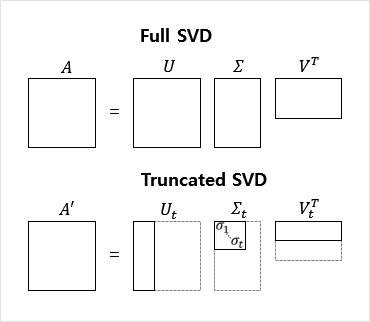   

[출처 : https://wikidocs.net/24949]  

- 특잇값 분해(Singular Value Decomposition, SVD) 란 m × n 크기의 임의의 사각 행렬 A를 위의 그림의 Full SVD와 같이 특이 벡터(singular vector)의 행렬와 특잇값(singular value)의 대각행렬로 분해하는 것
- 특잇값(singular value) 분해를 수행하면 U, Σ, V라는 세 가지 행렬을 얻을 수 있는데 이 중 행렬 Σ의 대각성분에서 특이값(singular value)을 얻을 수 있음

- 특이값 중에 가장 큰(중요한) t개만 남기고 해당 특잇값에 대응되는 특이벡터(singular vector)들로 행렬 A를 근사(approximate)하도록 하면 이를 절단된 특이값 분해(Truncated SVD)라고 함 - > 값의 손실이 일어남, t는 하이퍼파라미터



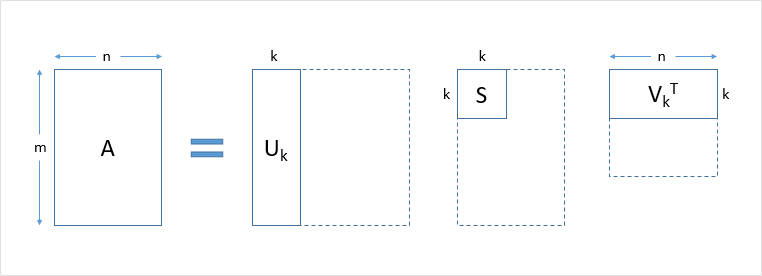  
[출처 : https://www.analyticsvidhya.com/blog/2018/10/stepwise-guide-topic-modeling-latent-semantic-analysis/]  

***A=USV^T***   

- LSA는 DTM이나 TF-IDF 행렬 등에 Truncated SVD를 수행하여 얻은 행렬 3개는 아래와 같은 의미를 가짐
    - U : 문서들과 관련된 의미들을 표현항 행렬 
    - V^T : 단어들과 관련된 의미들을 표현한 행렬
    - S : 각 의미의 중요도를 표현한 행렬 
- V^T행렬에서 k열은 전체 코퍼스로부터 얻어낸 k개의 주요 주제(topic)를 의미

**텍스트 데이터로부터 k개의 주제를 얻어내는 LSA 실습**

In [20]:
import pandas as pd
import numpy as np
import urllib.request
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [21]:
# NLTK 데이터셋 다운로드
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /aiffel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /aiffel/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /aiffel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
# 실습 데이터 다운로드
import os

csv_filename = os.getenv('HOME')+'/aiffel/topic_modelling/data/abcnews-date-text.csv'

urllib.request.urlretrieve("https://raw.githubusercontent.com/franciscadias/data/master/abcnews-date-text.csv", 
                           filename=csv_filename)

('/aiffel/aiffel/topic_modelling/data/abcnews-date-text.csv',
 <http.client.HTTPMessage at 0x7f5ab7331d60>)

In [23]:
data = pd.read_csv(csv_filename, on_bad_lines='skip')
data.shape

(1082168, 2)

In [24]:
data.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [25]:
text = data[['headline_text']].copy() # headline_text만 필요
text.head()

,headline_text
0,aba decides against community broadcasting lic...
1,act fire witnesses must be aware of defamation
2,a g calls for infrastructure protection summit
3,air nz staff in aust strike for pay rise
4,air nz strike to affect australian travellers


In [26]:
text.nunique() # 중복을 제외하고 유일한 시퀀스를 가지는 샘플의 개수를 출력

headline_text    1054983
dtype: int64

In [27]:
text.drop_duplicates(inplace=True) # 중복 샘플 제거
text.reset_index(drop=True, inplace=True)
text.shape

(1054983, 1)

데이터 정제 및 정규화

In [28]:
# NLTK 토크나이저를 이용해서 토큰화
text['headline_text'] = text.apply(lambda row: nltk.word_tokenize(row['headline_text']), axis=1)

# 불용어 제거
stop_words = stopwords.words('english')
text['headline_text'] = text['headline_text'].apply(lambda x: [word for word in x if word not in (stop_words)])

text.head()

,headline_text
0,"[aba, decides, community, broadcasting, licence]"
1,"[act, fire, witnesses, must, aware, defamation]"
2,"[g, calls, infrastructure, protection, summit]"
3,"[air, nz, staff, aust, strike, pay, rise]"
4,"[air, nz, strike, affect, australian, travellers]"


In [29]:
# 단어 정규화. 3인칭 단수 표현 -> 1인칭 변환, 과거형 동사 -> 현재형 동사 등을 수행한다.
text['headline_text'] = text['headline_text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x])

# 길이가 1 ~ 2인 단어는 제거.
text = text['headline_text'].apply(lambda x: [word for word in x if len(word) > 2])
print(text[:5])

0     [aba, decide, community, broadcast, licence]
1    [act, fire, witness, must, aware, defamation]
2       [call, infrastructure, protection, summit]
3            [air, staff, aust, strike, pay, rise]
4    [air, strike, affect, australian, travellers]
Name: headline_text, dtype: object


역토큰화 및 DTM 생성
- DTM을 생성하는 CountVectorizer 또는 TF-IDF 행렬을 생성하는 TfidfVectorizer의 입력으로 사용하기 위해서 토큰화 과정을 역으로 되돌리는 역토큰화(detokenization)를 수행

In [30]:
# 역토큰화 (토큰화 작업을 역으로 수행)
detokenized_doc = []
for i in range(len(text)):
    t = ' '.join(text[i])
    detokenized_doc.append(t)

train_data = detokenized_doc

In [31]:
train_data[:5]

['aba decide community broadcast licence',
 'act fire witness must aware defamation',
 'call infrastructure protection summit',
 'air staff aust strike pay rise',
 'air strike affect australian travellers']

In [32]:
# CountVectorizer를 사용해서 DTM 생성
# 상위 5000개의 단어만 사용
c_vectorizer = CountVectorizer(stop_words='english', max_features = 5000)
document_term_matrix = c_vectorizer.fit_transform(train_data)

In [33]:
# DTM 크기 확인 : (문서의 수 × 단어 집합의 크기)
print('행렬의 크기 :',document_term_matrix.shape)

행렬의 크기 : (1054983, 5000)


**scikit-learn TruncatedSVD 활용**

In [34]:
from sklearn.decomposition import TruncatedSVD

n_topics = 10 # 토픽수를 10개로 정함, k에 해당
lsa_model = TruncatedSVD(n_components = n_topics)
lsa_model.fit_transform(document_term_matrix)

array([[ 1.20321931e-02, -3.69056943e-03,  1.82994674e-02, ...,
         1.79403152e-03,  2.22822040e-04, -7.79634085e-03],
       [ 2.90376484e-02, -1.08895723e-02,  1.82191824e-02, ...,
         2.08969489e-03, -8.36583930e-03,  6.19761430e-03],
       [ 5.02816785e-03, -2.00388336e-03,  9.76397753e-03, ...,
        -2.97276943e-03,  1.38684276e-03, -1.91377075e-03],
       ...,
       [ 2.96577310e-02,  4.14668875e-03,  2.53792058e-02, ...,
         2.38843452e-02,  1.47797468e-02,  1.63766105e-02],
       [ 6.12237188e-02, -4.45125037e-03,  1.39568861e-01, ...,
         8.37237960e-01,  9.14223688e-01, -7.16254030e-02],
       [ 7.14539740e-02,  2.83449493e-02,  1.64601403e-03, ...,
         2.37188236e-04, -8.23899488e-04,  1.76075967e-02]])

In [35]:
print(lsa_model.components_.shape)

(10, 5000)


In [36]:
terms = c_vectorizer.get_feature_names_out() # 단어 집합. 5,000개의 단어가 저장됨.


# LSA 모델의 각 주제와 해당 주제에서 가장 중요한 상위 단어들이 출력
# 해당 주제의 특징적인 단어들이 무엇인지를 확인
def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components): # idx는 주제 인덱스, topic은 해당 주제에 대한 단어의 가중치를 포함한 배열
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(5)) for i in topic.argsort()[:-n - 1:-1]])
get_topics(lsa_model.components_, terms)

# "Topic %d:" % (idx+1): 현재 주제의 레이블을 출력
# [(feature_names[i], topic[i].round(5)) for i in topic.argsort()[:-n - 1:-1]]: 주제 내에서 가장 중요한 상위 n개의 단어와 그에 해당하는 가중치를 출력
# argsort(): 가중치 기준으로 내림차순  

Topic 1: [('police', 0.74636), ('man', 0.45358), ('charge', 0.21087), ('new', 0.14095), ('court', 0.11145)]
Topic 2: [('man', 0.69418), ('charge', 0.30035), ('court', 0.168), ('face', 0.11435), ('murder', 0.10653)]
Topic 3: [('new', 0.83647), ('plan', 0.23613), ('say', 0.18228), ('govt', 0.10989), ('council', 0.10943)]
Topic 4: [('say', 0.73967), ('plan', 0.35676), ('govt', 0.167), ('council', 0.1244), ('urge', 0.07751)]
Topic 5: [('plan', 0.73317), ('council', 0.16526), ('govt', 0.14889), ('urge', 0.0935), ('water', 0.06867)]
Topic 6: [('govt', 0.53669), ('court', 0.24422), ('urge', 0.23534), ('fund', 0.19357), ('face', 0.1656)]
Topic 7: [('charge', 0.5328), ('court', 0.45749), ('face', 0.3502), ('plan', 0.1149), ('murder', 0.11415)]
Topic 8: [('win', 0.60776), ('court', 0.43039), ('kill', 0.14189), ('crash', 0.11092), ('cup', 0.08029)]
Topic 9: [('win', 0.66121), ('charge', 0.45162), ('cup', 0.08303), ('world', 0.07608), ('australia', 0.06279)]
Topic 10: [('kill', 0.55561), ('crash',

### LDA(Latent Dirichlet Allocation)
- 문서의 집합에서 토픽을 찾아내는 프로세스를 토픽 모델링(Topic Modelling)이라고 함
- LDA는 토픽모델링의 대표적이 알고리즘 중 하나
- LDA는 토픽들은 확률 분포에 기반하여 단어들을 생성한다고 가정
- LDA는 단어들의 분포로부터 문서가 생성되는 과정을 역추적해 문서의 토픽을 찾아냄
- LDA는 각 토픽의 단어 분포와 각 문서의 토픽 분포를 추정

- LSA는 DTM을 차원 축소하여 축소 차원에서 근접 단어들을 토픽으로 묶음
- LDA는 단어가 특정 토픽에 존재할 확률과 문서에 특정 토픽이 존재할 확률을 결합 확률로 추정하여 토픽을 추출

LDA 실습은 LSA 실습 과정에서 만들어둔 전처리가 완료된 train_data를 재사용한다고 가정 -> 역토큰화 과정을 거친 데이터

In [37]:
# TfidfVectorizer를 사용하여 TF-IDF 행렬을 생성

# 상위 5,000개의 단어만 사용
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tf_idf_matrix = tfidf_vectorizer.fit_transform(train_data)

# TF-IDF 행렬의 크기를 확인해봅시다.
print('행렬의 크기 :', tf_idf_matrix.shape)

행렬의 크기 : (1054983, 5000)


scikit-learn LDA Model 활용

In [38]:
from sklearn.decomposition import LatentDirichletAllocation

lda_model = LatentDirichletAllocation(n_components=10, learning_method='online', random_state=777, max_iter=1)
lda_model.fit_transform(tf_idf_matrix)

array([[0.0335099 , 0.0335099 , 0.0335099 , ..., 0.17024867, 0.0335099 ,
        0.0335099 ],
       [0.03365631, 0.03365631, 0.03365631, ..., 0.03365631, 0.03365631,
        0.03365631],
       [0.25184095, 0.0366096 , 0.0366096 , ..., 0.0366096 , 0.0366096 ,
        0.0366096 ],
       ...,
       [0.26687206, 0.02914502, 0.02914502, ..., 0.13007484, 0.02916018,
        0.28739608],
       [0.10378115, 0.02637829, 0.12325014, ..., 0.02637829, 0.02637829,
        0.02637829],
       [0.03376055, 0.03376055, 0.2255442 , ..., 0.03376055, 0.03376055,
        0.03376055]])

In [39]:
print(lda_model.components_.shape)

(10, 5000)


In [40]:
# LDA의 결과 토픽과 각 단어의 비중을 출력합시다
terms = tfidf_vectorizer.get_feature_names_out() # 단어 집합. 5,000개의 단어가 저장됨.

def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(5)) for i in topic.argsort()[:-n-1:-1]])

get_topics(lda_model.components_, terms)

Topic 1: [('australia', 9359.06334), ('sydney', 5854.97288), ('attack', 4784.76322), ('change', 4193.63035), ('year', 3924.88997)]
Topic 2: [('government', 6344.07413), ('charge', 5947.12292), ('man', 4519.7974), ('state', 3658.16422), ('live', 3625.10473)]
Topic 3: [('australian', 7666.65651), ('say', 7561.01807), ('police', 5513.22932), ('home', 4048.38409), ('report', 3796.04446)]
Topic 4: [('melbourne', 5298.35047), ('south', 4844.59835), ('death', 4281.78433), ('china', 3214.44581), ('women', 3029.28443)]
Topic 5: [('win', 5704.0914), ('canberra', 4322.0963), ('die', 4025.63057), ('open', 3771.65243), ('warn', 3577.47151)]
Topic 6: [('court', 5246.3124), ('world', 4536.86331), ('country', 4166.34794), ('woman', 3983.97748), ('crash', 3793.50267)]
Topic 7: [('election', 5418.5038), ('adelaide', 4864.95604), ('house', 4478.6135), ('school', 3966.82676), ('2016', 3955.11155)]
Topic 8: [('trump', 8189.58575), ('new', 6625.2724), ('north', 3705.40987), ('rural', 3521.42659), ('donald',

## 텍스트 분포를 이용한 비지도 학습 토크나이저
- 텍스트의 분포를 이용해서 토큰화를 수행하는 비지도 학습 토크나이저

## 형태소 분석기와 단어 미등록 문제
- 한국어는 교착어라 영어와 달리 조사나 접사가 존재함
- 영어처럼 띄어쓰기 단위 토큰화를 적용하기는 적절하지 않을 수 있음


영어와 한국어를 띄어쓰기 토큰화 비교 

In [41]:
en_text = "The dog ran back to the corner near the spare bedrooms"
print(en_text.split())

['The', 'dog', 'ran', 'back', 'to', 'the', 'corner', 'near', 'the', 'spare', 'bedrooms']


In [42]:
kor_text = "사과의 놀라운 효능이라는 글을 봤어. 그래서 오늘 사과를 먹으려고 했는데 사과가 썩어서 슈퍼에 가서 사과랑 오렌지 사 왔어"
print(kor_text.split())

['사과의', '놀라운', '효능이라는', '글을', '봤어.', '그래서', '오늘', '사과를', '먹으려고', '했는데', '사과가', '썩어서', '슈퍼에', '가서', '사과랑', '오렌지', '사', '왔어']


In [43]:
# 형태소 분석기 Okt 적용 
from konlpy.tag import Okt

tokenizer = Okt()
print(tokenizer.morphs(kor_text))

['사과', '의', '놀라운', '효능', '이라는', '글', '을', '봤어', '.', '그래서', '오늘', '사과', '를', '먹으려고', '했는데', '사과', '가', '썩어서', '슈퍼', '에', '가서', '사과', '랑', '오렌지', '사', '왔어']


새롭게 만들어진 단어는 어떻게 인식할까? 

In [44]:
print(tokenizer.morphs('모두의연구소에서 자연어 처리를 공부하는 건 정말 즐거워'))

['모두', '의', '연구소', '에서', '자연어', '처리', '를', '공부', '하는', '건', '정말', '즐거워']


## soynlp
- 품사 태깅, 형태소 분석 등을 지원하는 한국어 형태소 분석기
- 자주 등장하는 신조어나 오탈자, 그리고 형태소 분석에서 발생하는 OOV(Out-of-Vocabulary) 문제를 처리하는 데 강점
- 비지도 학습으로 형태소 분석을 한다는 특징을 가짐
- 데이터에 자주 등장하는 단어들을 형태소로 분석
- 내부적 단어 점수표를 이용 -> 응집 확률(cohesion probability) 과 브랜칭 엔트로피(branching entropy) 를 활용

In [45]:
# 예제 말뭉치 다운로드
import urllib.request

txt_filename = os.getenv('HOME')+'/aiffel/topic_modelling/data/2016-10-20.txt'

urllib.request.urlretrieve("https://raw.githubusercontent.com/lovit/soynlp/master/tutorials/2016-10-20.txt",\
                            filename=txt_filename)

('/aiffel/aiffel/topic_modelling/data/2016-10-20.txt',
 <http.client.HTTPMessage at 0x7f5a7f5765e0>)

In [46]:
from soynlp import DoublespaceLineCorpus

# 말뭉치에 대해서 다수의 문서로 분리
corpus = DoublespaceLineCorpus(txt_filename)
len(corpus)

30091

In [47]:
i = 0
for document in corpus:
    if len(document) > 0:
        print(document)
        i = i+1
    if i == 3:
        break

19  1990  52 1 22
오패산터널 총격전 용의자 검거 서울 연합뉴스 경찰 관계자들이 19일 오후 서울 강북구 오패산 터널 인근에서 사제 총기를 발사해 경찰을 살해한 용의자 성모씨를 검거하고 있다 성씨는 검거 당시 서바이벌 게임에서 쓰는 방탄조끼에 헬멧까지 착용한 상태였다 독자제공 영상 캡처 연합뉴스  서울 연합뉴스 김은경 기자 사제 총기로 경찰을 살해한 범인 성모 46 씨는 주도면밀했다  경찰에 따르면 성씨는 19일 오후 강북경찰서 인근 부동산 업소 밖에서 부동산업자 이모 67 씨가 나오기를 기다렸다 이씨와는 평소에도 말다툼을 자주 한 것으로 알려졌다  이씨가 나와 걷기 시작하자 성씨는 따라가면서 미리 준비해온 사제 총기를 이씨에게 발사했다 총알이 빗나가면서 이씨는 도망갔다 그 빗나간 총알은 지나가던 행인 71 씨의 배를 스쳤다  성씨는 강북서 인근 치킨집까지 이씨 뒤를 쫓으며 실랑이하다 쓰러뜨린 후 총기와 함께 가져온 망치로 이씨 머리를 때렸다  이 과정에서 오후 6시 20분께 강북구 번동 길 위에서 사람들이 싸우고 있다 총소리가 났다 는 등의 신고가 여러건 들어왔다  5분 후에 성씨의 전자발찌가 훼손됐다는 신고가 보호관찰소 시스템을 통해 들어왔다 성범죄자로 전자발찌를 차고 있던 성씨는 부엌칼로 직접 자신의 발찌를 끊었다  용의자 소지 사제총기 2정 서울 연합뉴스 임헌정 기자 서울 시내에서 폭행 용의자가 현장 조사를 벌이던 경찰관에게 사제총기를 발사해 경찰관이 숨졌다 19일 오후 6시28분 강북구 번동에서 둔기로 맞았다 는 폭행 피해 신고가 접수돼 현장에서 조사하던 강북경찰서 번동파출소 소속 김모 54 경위가 폭행 용의자 성모 45 씨가 쏜 사제총기에 맞고 쓰러진 뒤 병원에 옮겨졌으나 숨졌다 사진은 용의자가 소지한 사제총기  신고를 받고 번동파출소에서 김창호 54 경위 등 경찰들이 오후 6시 29분께 현장으로 출동했다 성씨는 그사이 부동산 앞에 놓아뒀던 가방을 챙겨 오패산 쪽으로 도망간 후였다  김 경위는 오패산 터널 입구 오른쪽의 급경사에서 성씨에

In [48]:
from soynlp.word import WordExtractor

word_extractor = WordExtractor()
word_extractor.train(corpus) # 학습을 통해 점수 생성
word_score_table = word_extractor.extract() #  전체 코퍼스에 대해 단어 점수표를 계산

training was done. used memory 2.435 Gb
all cohesion probabilities was computed. # words = 223348
all branching entropies was computed # words = 361598
all accessor variety was computed # words = 361598


**응집 확률** 
- 내부 문자열(substring)이 얼마나 응집하여 자주 등장하는지를 판단하는 척도  
- 각 문자열이 주어졌을 때 그다음 문자가 나올 확률을 계산하여 누적 곱을 함
- 값이 높을 수록 전체 코퍼스에서 하나의 단어로 등장할 가능성이 높음


In [49]:
word_score_table["반포한"].cohesion_forward

0.08838002913645132

In [50]:
word_score_table["반포한강"].cohesion_forward

0.19841268168224552

In [51]:
word_score_table["반포한강공"].cohesion_forward

0.2972877884078849

In [52]:
word_score_table["반포한강공원"].cohesion_forward

0.37891487632839754

In [53]:
word_score_table["반포한강공원에"].cohesion_forward

0.33492963377557666

**브랜칭 엔트로피(Branching Entropy)**
- 확률 분포의 엔트로피값을 사용
- 주어진 문자열에서 다음 문자가 등장할 수 있는 가능성을 판단하는 척도


In [54]:
word_score_table["디스"].right_branching_entropy

1.6371694761537934

In [55]:
word_score_table["디스플"].right_branching_entropy

-0.0

In [56]:
word_score_table["디스플레"].right_branching_entropy

-0.0

In [57]:
word_score_table["디스플레이"].right_branching_entropy

3.1400392861792916

**soynlp의 LTokenizer**
- 띄어쓰기 단위로 잘 나뉜 문장은 L 토크나이저(LTokenizer)를 사용하면 좋음

In [58]:
from soynlp.tokenizer import LTokenizer

scores = {word:score.cohesion_forward for word, score in word_score_table.items()}
l_tokenizer = LTokenizer(scores=scores)
l_tokenizer.tokenize("국제사회와 우리의 노력들로 범죄를 척결하자", flatten=False)

[('국제사회', '와'), ('우리', '의'), ('노력', '들로'), ('범죄', '를'), ('척결', '하자')]

**최대 점수 토크나이저(MaxScoreTokenizer)**
- 띄어쓰기가 되어 있지 않은 문장에서 점수가 높은 글자 시퀀스를 순차적으로 찾아내는 토크나이저

In [59]:
from soynlp.tokenizer import MaxScoreTokenizer

maxscore_tokenizer = MaxScoreTokenizer(scores=scores)
maxscore_tokenizer.tokenize("국제사회와우리의노력들로범죄를척결하자")

['국제사회', '와', '우리', '의', '노력', '들로', '범죄', '를', '척결', '하자']